# Task1

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# # from ydata_profiling import ProfileReport
from google.colab import drive

In [4]:
drive.mount('/content/drive')
path = './drive/MyDrive/Colab Notebooks/Inno_MachineLearning/2_assignment/lateness_data.json'

Mounted at /content/drive


In [5]:
data = pd.read_json(path)
# data = pd.read_json('./lateness_data.json')
data.head()

direct_delivery batched_pickup transport_type          order_time  \
0             yes            yes     automobile 2023-10-09 19:23:55   
1             yes            yes     automobile 2023-07-31 11:43:13   
2             yes            yes        bicycle 2023-08-21 19:35:37   
3             yes            yes     automobile 2023-09-06 00:19:29   
4             yes            yes     automobile 2023-09-06 19:23:28   

   delivery_distance  order_preparation_time  responsible_id  store_latitude  \
0               7798                      10            4444       55.795518   
1                553                      10            3798       55.783786   
2                711                      20            7595       55.729464   
3               3538                      10            3797       55.731702   
4               4169                      10            9509       55.781360   

   store_longitude  client_latitude  client_longitude status  status_time  
0        37.631224        55.780525         37.700847  early           18  
1        37.624401        55.781943         37.628641  early            6  
2        37.692976        55.732003         37.689528  early            9  
3        37.581492        55.726069         37.604986  early           16  
4        37.677339        55.787238         37.700311  early            5

In [6]:
data.describe()

delivery_distance  order_preparation_time  responsible_id  \
count      110763.000000           110763.000000   110763.000000   
mean         3877.179536               19.702762     5770.800728   
std          2697.434493                9.476254     2023.369875   
min             1.000000                0.000000     3052.000000   
25%          1946.000000               10.000000     3885.000000   
50%          3245.000000               20.000000     5212.000000   
75%          5071.000000               25.000000     7757.000000   
max         30119.000000              180.000000     9789.000000   

       store_latitude  store_longitude  client_latitude  client_longitude  \
count   110763.000000    110763.000000    110763.000000     110763.000000   
mean        55.460305        37.318144        55.460117         37.320963   
std          0.613763         1.289865         0.611779          1.288022   
min         54.091324        32.773922        54.038147         32.752974   
25%         55.720657        37.583043        55.704080         37.583957   
50%         55.758925        37.646745        55.751787         37.643795   
75%         55.774876        37.667778        55.779691         37.680513   
max         55.840960        40.741366        55.861033         40.810624   

         status_time  
count  110763.000000  
mean        8.528949  
std         7.561295  
min         0.000000  
25%         2.000000  
50%         6.000000  
75%        14.000000  
max        30.000000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110763 entries, 0 to 110762
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   direct_delivery         110763 non-null  object        
 1   batched_pickup          110763 non-null  object        
 2   transport_type          110763 non-null  object        
 3   order_time              110763 non-null  datetime64[ns]
 4   delivery_distance       110763 non-null  int64         
 5   order_preparation_time  110763 non-null  int64         
 6   responsible_id          110763 non-null  int64         
 7   store_latitude          110763 non-null  float64       
 8   store_longitude         110763 non-null  float64       
 9   client_latitude         110763 non-null  float64       
 10  client_longitude        110763 non-null  float64       
 11  status                  110763 non-null  object        
 12  status_time             110763

Let's extract features from order_time feature

year - 2023 at all samples, so we can drop it

and sort values by data


In [8]:
data['order_month'] = data['order_time'].dt.month
data['order_day'] = data['order_time'].dt.day
data['order_hour'] = data['order_time'].dt.hour
data['order_minute'] = data['order_time'].dt.minute
data.drop('order_time', axis=1, inplace=True)

In [9]:
data.dtypes

direct_delivery            object
batched_pickup             object
transport_type             object
delivery_distance           int64
order_preparation_time      int64
responsible_id              int64
store_latitude            float64
store_longitude           float64
client_latitude           float64
client_longitude          float64
status                     object
status_time                 int64
order_month                 int64
order_day                   int64
order_hour                  int64
order_minute                int64
dtype: object

In [10]:
data = data.sort_values(by=['order_month', 'order_day', 'order_hour', 'order_minute'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110763 entries, 62731 to 31293
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   direct_delivery         110763 non-null  object 
 1   batched_pickup          110763 non-null  object 
 2   transport_type          110763 non-null  object 
 3   delivery_distance       110763 non-null  int64  
 4   order_preparation_time  110763 non-null  int64  
 5   responsible_id          110763 non-null  int64  
 6   store_latitude          110763 non-null  float64
 7   store_longitude         110763 non-null  float64
 8   client_latitude         110763 non-null  float64
 9   client_longitude        110763 non-null  float64
 10  status                  110763 non-null  object 
 11  status_time             110763 non-null  int64  
 12  order_month             110763 non-null  int64  
 13  order_day               110763 non-null  int64  
 14  order_hour       

<Axes: xlabel='delivery_distance', ylabel='Count'>

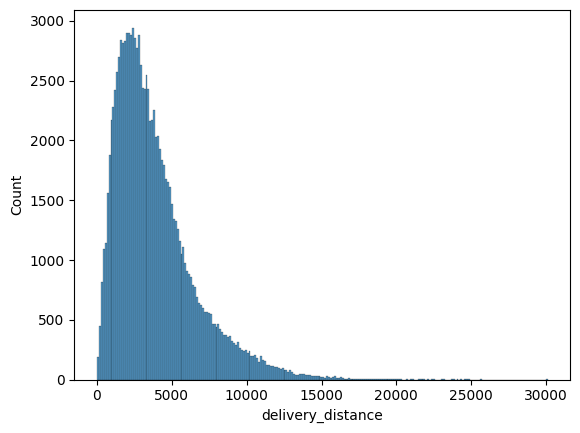

In [12]:
sns.histplot(data['delivery_distance'])

<Axes: xlabel='status_time', ylabel='Count'>

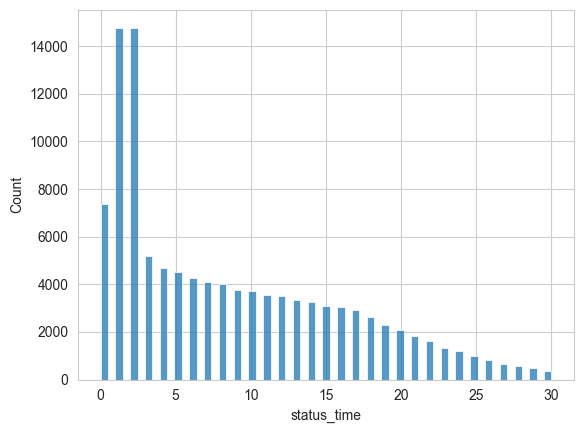

In [ ]:
sns.histplot(data['status_time'])

<Axes: xlabel='order_preparation_time', ylabel='Count'>

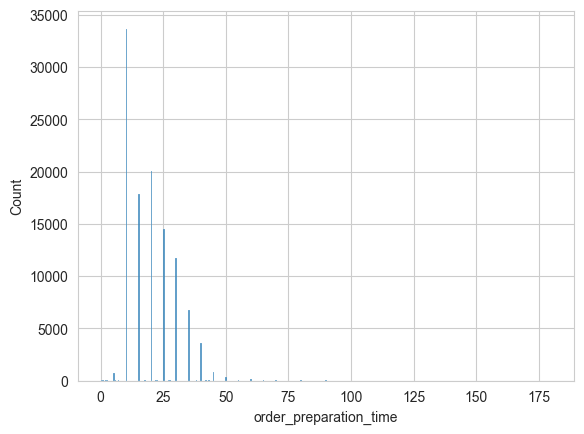

In [ ]:
sns.histplot(data['order_preparation_time'])

<Axes: >

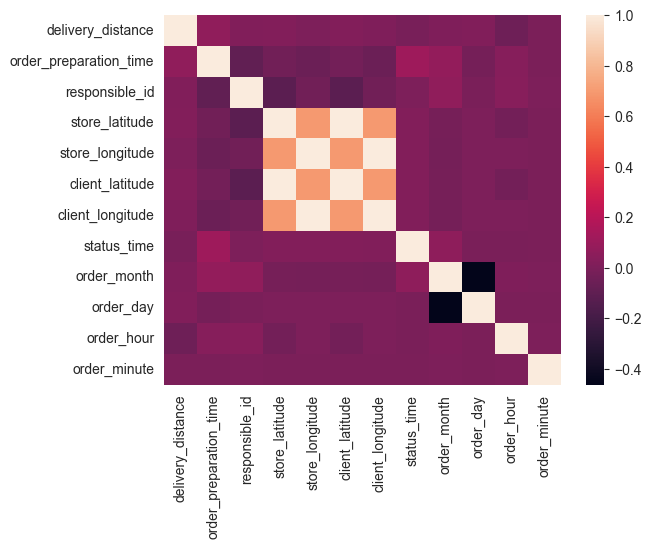

In [ ]:
sns.heatmap(data.select_dtypes(include=np.number).corr())

We see that there's a correlation between store and client coordinates(which is should be)

Let's check the object features

<Axes: xlabel='direct_delivery', ylabel='Count'>

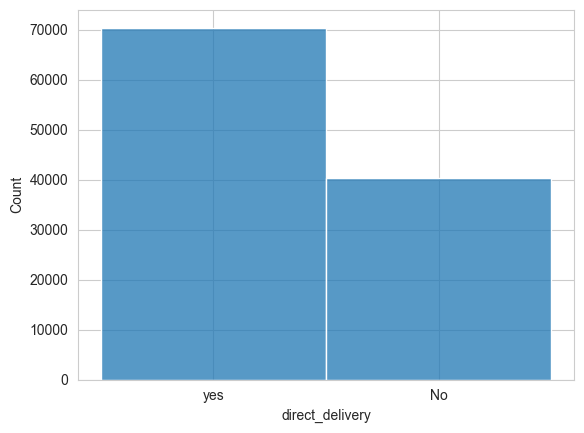

In [ ]:
sns.histplot(data['direct_delivery'])

<Axes: xlabel='batched_pickup', ylabel='Count'>

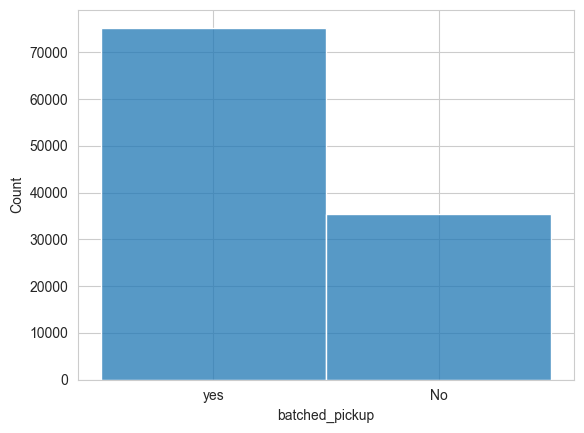

In [ ]:
sns.histplot(data['batched_pickup'])

<Axes: xlabel='transport_type', ylabel='Count'>

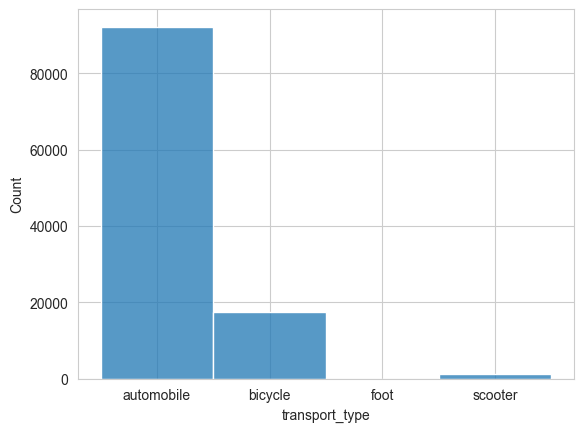

In [ ]:
sns.histplot(data['transport_type'])

There is a nominal label - ResponsibleID, which should be dropped.
There is also a high imbalance(by transport_type feature) in data since there's a 46 couriers who delivered on foot(transport_type) out of ~1K, this samples should be dropped.

In [ ]:
data = data[data['transport_type'] != 'foot']
data.drop(['responsible_id'], axis=1, inplace=True)

<Axes: xlabel='status', ylabel='Count'>

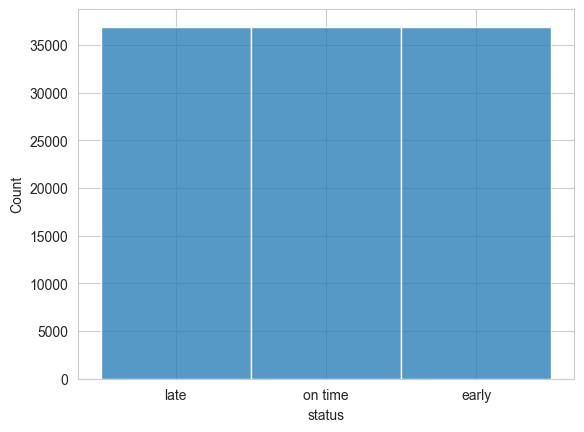

In [ ]:
sns.histplot(data['status'])

We can see that data is balanced

In [14]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.0 MB/s eta 0:00:00


Splitting the data

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from category_encoders import OneHotEncoder


y = data[['status', 'status_time']]
X = data.drop(['status', 'status_time'], axis=1)


bin_mapping = {'yes': 1, 'No': 0}

X['direct_delivery'] = X['direct_delivery'].map(bin_mapping)
X['batched_pickup'] = X['batched_pickup'].map(bin_mapping)


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

ohe = OneHotEncoder(cols=['transport_type'])
X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test)

target_map = {
    'early': 0,
    'on time': 1,
    'late': 2
}

y_train['status'] = y_train['status'].map(target_map)
y_test['status'] = y_test['status'].map(target_map)

std_scaler = StandardScaler()
X_train = pd.DataFrame(std_scaler.fit_transform(X_train, y_train), columns=X_train.columns)

X_test = pd.DataFrame(data=std_scaler.transform(X_test), columns=X_test.columns)

In [26]:
X_train

direct_delivery  batched_pickup  transport_type_1  transport_type_2  \
0             0.756061        0.687646          0.450673         -0.432699   
1             0.756061       -1.454237          0.450673         -0.432699   
2            -1.322644        0.687646          0.450673         -0.432699   
3             0.756061        0.687646          0.450673         -0.432699   
4            -1.322644        0.687646          0.450673         -0.432699   
...                ...             ...               ...               ...   
88605         0.756061       -1.454237         -2.218902          2.311074   
88606        -1.322644        0.687646          0.450673         -0.432699   
88607         0.756061       -1.454237          0.450673         -0.432699   
88608         0.756061       -1.454237          0.450673         -0.432699   
88609         0.756061        0.687646          0.450673         -0.432699   

       transport_type_3  transport_type_4  delivery_distance  \
0             -0.104102         -0.019878          -0.131980   
1             -0.104102         -0.019878          -0.195653   
2             -0.104102         -0.019878          -0.356685   
3             -0.104102         -0.019878          -1.058196   
4             -0.104102         -0.019878           0.483276   
...                 ...               ...                ...   
88605         -0.104102         -0.019878          -0.965648   
88606         -0.104102         -0.019878           5.647798   
88607         -0.104102         -0.019878          -0.854221   
88608         -0.104102         -0.019878          -0.685414   
88609         -0.104102         -0.019878          -0.416656   

       order_preparation_time  responsible_id  store_latitude  \
0                   -0.496158       -0.041679       -2.184295   
1                    3.199169       -0.212705        0.501761   
2                   -1.024062       -0.100006       -1.031386   
3                   -0.496158        1.750629       -2.181789   
4                   -1.024062       -0.413388        0.501613   
...                       ...             ...             ...   
88605               -0.496158       -0.328864        0.443766   
88606                0.031746       -0.041679       -2.184295   
88607                0.031746       -0.885438       -2.194146   
88608               -0.496158        0.731396       -0.411632   
88609               -1.024062       -0.413388        0.501613   

       store_longitude  client_latitude  client_longitude  order_month  \
0            -1.579340        -2.218305         -1.567481    -0.401832   
1             0.266538         0.467029          0.254480    -1.501980   
2             2.218603        -1.014702          2.210131     0.698317   
3            -1.557076        -2.178479         -1.558604    -0.401832   
4             0.270132         0.442717          0.275409     0.698317   
...                ...              ...               ...          ...   
88605         0.201815         0.458098          0.200633    -1.501980   
88606        -1.579340        -2.145147         -1.463339    -0.401832   
88607        -1.568031        -2.203736         -1.573168    -0.401832   
88608         2.656450        -0.423233          2.650561    -1.501980   
88609         0.270132         0.532025          0.264395    -0.401832   

       order_day  order_hour  order_minute  
0      -1.348879    0.351788      1.320025  
1       1.345046   -0.736352     -0.761286  
2      -1.236632    1.077216      0.221555  
3      -1.461126   -0.010925     -0.587843  
4      -0.563151    1.077216     -0.761286  
...          ...         ...           ...  
88605   1.120552    1.439929     -1.512870  
88606  -0.675398    0.895859     -0.298772  
88607  -0.563151    0.170432     -0.240958  
88608   0.559318    0.895859      0.048113  
88609  -1.685620    1.077216      1.551281  

[88610 rows x 17 columns]

In [ ]:
# data.isnull().sum().sum

Index(['direct_delivery', 'batched_pickup', 'transport_type_1',
       'transport_type_2', 'transport_type_3', 'delivery_distance',
       'order_preparation_time', 'store_latitude', 'store_longitude',
       'client_latitude', 'client_longitude', 'status_time', 'order_month',
       'order_day', 'order_hour', 'order_minute'],
      dtype='object')

tensors

In [27]:
import torch
from torch.utils.data import Dataset, DataLoader


class OrderDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
      return len(self.X)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx], dtype=torch.float32), torch.tensor(self.y[idx], dtype=torch.float32)

train_set = OrderDataset(X_train.values, y_train.values)
test_set = OrderDataset(X_test.values, y_test.values)

train_loader = DataLoader(train_set, batch_size=32, shuffle=False)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)


In [28]:
from torch import nn
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter


class MLTNet(nn.Module):
  def __init__(self, input_dim=17, n_classes=3):
    super(MLTNet, self).__init__()
    self.fc1 = nn.Linear(input_dim, 14)
    self.fc2 = nn.Linear(14, 10)
    self.fc3 = nn.Linear(10, 12)
    self.fc4 = nn.Linear(12, 4)

    # class_layer
    self.classification_layer = nn.Linear(4, n_classes)
    # regr_layer
    self.regression_layer = nn.Linear(4, 1)

  def forward(self, x):
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.relu(x)
    x = self.fc4(x)

    classification_result = F.log_softmax(self.classification_layer(x), dim=1)
    regression_result = self.regression_layer(x)

    return classification_result, regression_result


use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = MLTNet().to(device)

print(device)

cpu


In [29]:
epochs = 10
lr = 0.01
momentum = 0.5
log_interval = 500

In [30]:
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import f1_score, balanced_accuracy_score


writer = SummaryWriter()
criterion_classification = nn.NLLLoss()
criterion_regression = nn.MSELoss()

losses = []

def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()

        output_class, output_regrs = model(data)

        loss_class = criterion_classification(output_class, target[:, 0].long())
        loss_regrs = criterion_regression(output_regrs.squeeze(), target[:, 1])

        loss = loss_class + loss_regrs

        loss.backward()
        optimizer.step()

        losses.append((loss.item(), loss_class.item(), loss_regrs.item()))

        writer.add_scalar('tot.loss/train', loss.item(), epoch * len(train_loader) + batch_idx)
        writer.add_scalar('class.loss/train', loss_class.item(), epoch * len(train_loader) + batch_idx)
        writer.add_scalar('regrs.loss/train', loss_regrs.item(), epoch * len(train_loader) + batch_idx)


        # if batch_idx % log_interval == 0:
        #     print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
        #           f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

    return losses

def test(model, device, test_loader):
    model.eval()
    # test_loss = 0
    running_total = 0
    running_reg = 0
    running_cls = 0
    total_count = 0
    correct = 0

    pred_class = []
    true_class = []

    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            data, target = data.to(device), target.to(device)

            output_class, output_regrs = model(data)

            loss_class = criterion_classification(output_class, target[:, 0].long())
            loss_regrs = criterion_regression(output_regrs.squeeze(), target[:, 1])

            loss = loss_class + loss_regrs

            running_total += loss.item()
            running_reg += loss_regrs.item()
            running_cls += loss_class.item()
            total_count += 1
            pred_class.append(output_class.argmax(dim=1).cpu().numpy())
            true_class.append(target[:, 0].cpu().numpy())

            pred = output_class.argmax(dim=1, keepdim=True)

            writer.add_scalar('tot.loss/test', loss.item(), epoch * len(train_loader) + batch_idx)
            writer.add_scalar('class.loss/test', loss_class.item(), epoch * len(train_loader) + batch_idx)
            writer.add_scalar('regrs.loss/test', loss_regrs.item(), epoch * len(train_loader) + batch_idx)

            # correct += pred.eq(target_class.view_as(pred)).sum().item()

    f1 = f1_score(np.concatenate(true_class, axis=0), np.concatenate(pred_class, axis=0), average='weighted')
    avg_tot_l = running_total / total_count
    avg_cls_l = running_cls / total_count
    avg_reg_l = running_reg / total_count

    print(f'avg tot loss:{avg_tot_l}')
    print(f'avg class loss:{avg_cls_l}')
    print(f'avg regrs loss:{avg_reg_l}')
    print(f'f1_score: {f1}')

    writer.add_scalar('f1_score', f1)

    return losses


optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    print()

avg tot loss:56.06905080676939
avg class loss:54.98712937381188
avg regrs loss:1.0819213380029191
f1_score: 0.40721356313555684

avg tot loss:55.92300877151379
avg class loss:54.8576480815937
avg regrs loss:1.0653606592146694
f1_score: 0.4364055474950417

avg tot loss:55.866692753581255
avg class loss:54.81217085988319
avg regrs loss:1.054521903245136
f1_score: 0.4463584470378248

avg tot loss:55.826293645311054
avg class loss:54.78132378108918
avg regrs loss:1.0449698498582771
f1_score: 0.45436006797096684

avg tot loss:55.803748517497446
avg class loss:54.76553371423939
avg regrs loss:1.0382148389520411
f1_score: 0.45709077415362565

avg tot loss:55.78989240032598
avg class loss:54.754328784144455
avg regrs loss:1.0355635779932635
f1_score: 0.45932368265481616

avg tot loss:55.78085517332839
avg class loss:54.746911110816065
avg regrs loss:1.033944147661823
f1_score: 0.46105359301057885

avg tot loss:55.77731452875839
avg class loss:54.74438783995173
avg regrs loss:1.0329266343625938

In [33]:
writer.flush()
writer.close()

## Multitask Network Cascades

Now we will try to improve model by using classification output as a feature for regression layer. We will also add batch normalization and dropout layers

In [34]:
from torch import nn
import torch.nn.functional as F

class MNCNet(nn.Module):
    def __init__(self, input_dim=17, n_classes=3):
        super(MNCNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 14)
        self.bn1 = nn.BatchNorm1d(14)
        self.dropout1 = nn.Dropout(0.2)

        self.fc2 = nn.Linear(14, 10)
        self.bn2 = nn.BatchNorm1d(10)
        self.dropout2 = nn.Dropout(0.2)

        self.fc3 = nn.Linear(10, 12)
        self.bn3 = nn.BatchNorm1d(12)
        self.dropout3 = nn.Dropout(0.2)

        self.fc4 = nn.Linear(12, 4)
        self.bn4 = nn.BatchNorm1d(4)
        self.dropout4 = nn.Dropout(0.2)

        # Classification layer
        self.classification_layer = nn.Linear(4, n_classes)
        # Regression layer
        self.regression_layer = nn.Linear(4 + 3, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        x = self.bn3(x)
        x = F.relu(x)
        x = self.dropout3(x)

        x = self.fc4(x)
        x = self.bn4(x)
        x = F.relu(x)
        x = self.dropout4(x)

        classification_result = F.log_softmax(self.classification_layer(x), dim=1)
        regression_result = self.regression_layer(torch.cat([x, classification_result], dim=1))

        return classification_result, regression_result


use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = MNCNet().to(device)

In [36]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
writer = SummaryWriter('./runs/task1_improved2')
criterion_classification = nn.NLLLoss()
criterion_regression = nn.MSELoss()

# Training loop
for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    print()

avg tot loss:55.92197859132445
avg class loss:54.85862049086269
avg regrs loss:1.0633580817976727
f1_score: 0.3524441367180879

avg tot loss:56.05385333084613
avg class loss:54.98414781633738
avg regrs loss:1.0697054400244488
f1_score: 0.3936841450472788

avg tot loss:56.01848001466341
avg class loss:54.94317295024921
avg regrs loss:1.0753070320745912
f1_score: 0.3428371094200903

avg tot loss:55.829093052367284
avg class loss:54.758169507223464
avg regrs loss:1.0709235406713224
f1_score: 0.4436810617859085

avg tot loss:55.826295197612104
avg class loss:54.75638223623301
avg regrs loss:1.0699129429730503
f1_score: 0.4059119821490219

avg tot loss:55.99859593544171
avg class loss:54.92927480260015
avg regrs loss:1.0693211676754477
f1_score: 0.36865562831461046

avg tot loss:55.85222373345886
avg class loss:54.78619695776297
avg regrs loss:1.066026855684806
f1_score: 0.3721886793506172

avg tot loss:55.863381257820954
avg class loss:54.80063190707913
avg regrs loss:1.0627494282364673
f1

# Conclusion

We tried to improve baseline model by adding batch normalization and dropout layers, but it did not performed better then the baseline. This could be because the baseline was already efficient enough and adding dropout only made it more unstable.

Possible improvements can be done by adding more data and maybe even synthetic/augmented data and by using more complex models and optimization strategies.